In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #importa biblitoeca gráfica
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")

In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#cleaning the dataset
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()
# defines that no column has null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

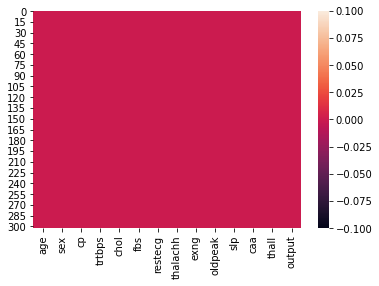

In [ ]:
sns.heatmap(df.isnull())
#heatmap also tells that we dont have any null values

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df_cols = df.columns
rem_cols = ['sex','cp','fbs','exng','caa','thall','output']

In [ ]:
main_list = list(set(df_cols).difference(rem_cols))

In [ ]:
main_list

['trtbps', 'restecg', 'age', 'thalachh', 'oldpeak', 'slp', 'chol']

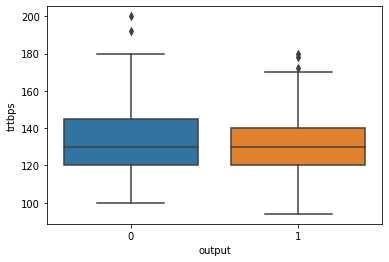

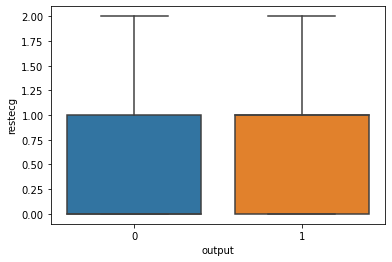

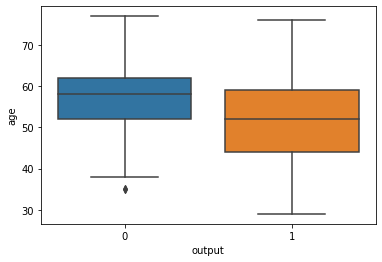

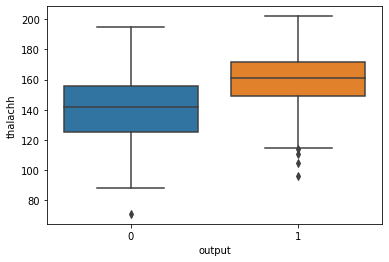

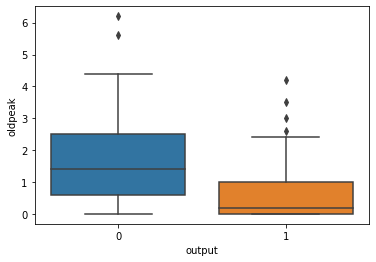

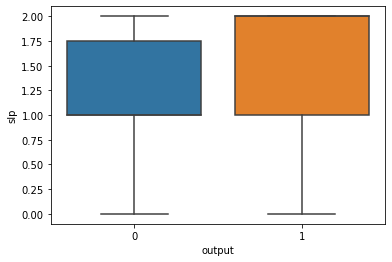

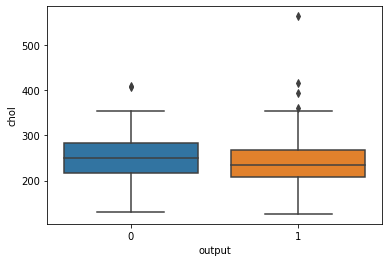

In [ ]:
for i in main_list:
    plt.figure()
    sns.boxplot(x= df['output'],y=df[i])
    

In [ ]:
for i in rem_cols:
    print(df[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
0    204
1     99
Name: exng, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
1    165
0    138
Name: output, dtype: int64


In [ ]:
#finding percentage of people with heart attack in the dataset
df.output.value_counts() / len(df)
# thus we can see percentage of people having heart attack is more than those not having heart attack

1    0.683168
0    0.316832
Name: sex, dtype: float64

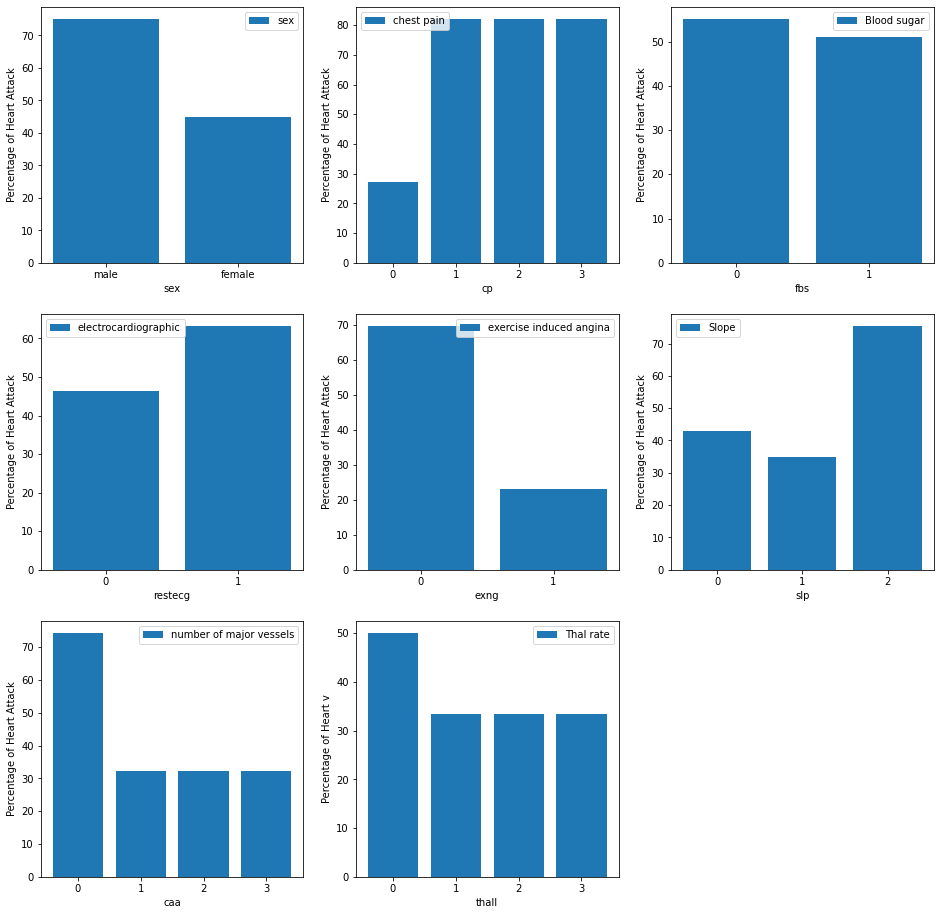

In [ ]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(332)
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain')
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(334)
name='restecg'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic')
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(335)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(336)
name='slp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
     (100)*df[df[name]==2]['output'].sum()/len(df[df[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(337)
name='caa'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(338)
name='thall'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart v')
plt.legend()

Thus from above we can conclude the following 
1.Males higher chances of having heart attack when compared to females
2.People having chest pain have high chances of getting heart attack
3.Blood sugar does not have much impact on heart attack
4.People having induced to exercise angina are less probable to get heart attack


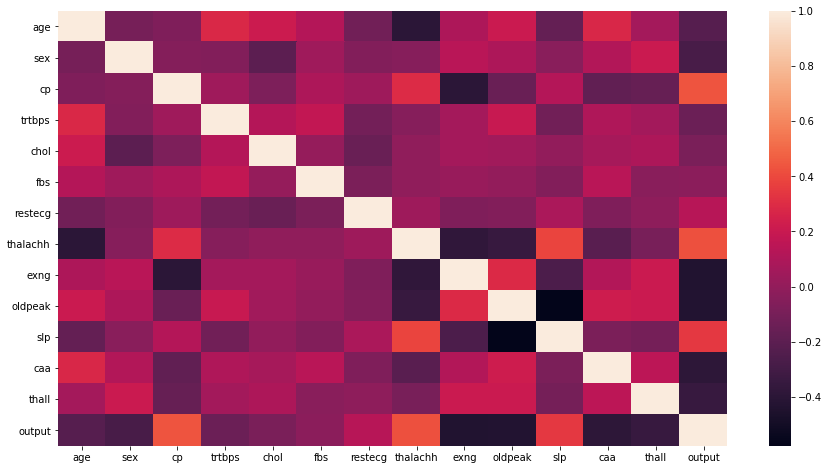

In [ ]:
#checking correlations between variables
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler()
pt = PowerTransformer()

In [ ]:
X = df.drop(columns='output')
y = df['output']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [ ]:
X_train = pd.DataFrame(pt.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(pt.transform(X_test),columns=X.columns)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.7377049180327869

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X2 = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X2 = pd.DataFrame(pt.fit_transform(X2),columns=X.columns)
cv = cross_val_score(knn,X2,y)

In [ ]:
cv.mean()

0.7621857923497268

Thus we can see that heart attack has a high positive correlation with heart rate achieved while has a negative correlation with previous peak